## Задача.

В некоторой комнании менеджер по подбору персонала разбирал полученные отклики на вакансию. Описание вакансии содержало одно небольшое задание для соискателей, которое проверяло внимательное прочтение ваканисии перед откликом и способности решить несложную логическую задачу и доступно изложить решение.

В процессе просмотра откликов менеджер вел небольшой Excel-файл, где фиксировал краткую информацию по каждому соискателю. В какой-то момент менеджеру по подбору персонала начало *казаться*, что есть связь между возрастом соискателей и наличием решения задачи в сопроводительном письме.

Перед тем как передать результаты скриннинга нанимающему менеджеру, менеджер по подбору персонала решил поделиться своими мыслями о связи возраста с наличием решения. Для этого он попросил аналитика данных построить график, который подтвердил бы его догадки.

Однако аналитик не стал доверять тому, что *показалось* менеджеру по подбору персонала и решил все перепроверить и самостоятельно сделать вывод. Как они договорились, аналитик вернулся ровно с одним графиком и коротким (длинной в 1 твит) комментарием к графику.

-------

Собственно, представьте себя в роли аналитика и сделайте **только 1 график и короткий комментарий** (длинной <= 1 твит), которыми вы бы хотели наилучшим образом описать данные из файла **data.csv** (находится в этой же папке).

Преобразования от сырых данных к результату вы можете передать в **jupyter notebook** файле, чтобы можно было отследить логику манипуляций с данными.

-------

P.S. Все персонажи вымышлены и любые совпадения случайны.

-------

Готовы подождать ваше решение до пятницы следующей недели включительно (22 ноября), но только, пожалуйста, не тратьте на него всю неделю - оно делается достаточно быстро.

Решение вы можете отправить ссылкой на Google Drive (предпочтительнее) или ipynb файл на почту indieelevate@gmail.com. Во втором случае, пожалуйста, напишите в чате на hh.ru, что вы отправили ответ на имейл и укажите ваш имеил, с которого вы отправили, чтобы ответ не потерялся.

https://drive.google.com/file/d/19rhaQ6anGVr876aadnX2I1eQHsILJnmj/view?usp=sharing

In [2]:
! gdown --id 19rhaQ6anGVr876aadnX2I1eQHsILJnmj

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19rhaQ6anGVr876aadnX2I1eQHsILJnmj
To: /content/data.csv
100% 6.44k/6.44k [00:00<00:00, 14.9MB/s]


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/data.csv')

In [5]:
df

,applicant_name,Age,Ответ на вопрос
0,name_0,49.0,нет
1,name_1,37.0,да
2,name_2,18.0,нет
3,name_3,36.0,неверное решение
4,name_4,31.0,да
...,...,...,...
320,name_320,19.0,нет
321,name_321,21.0,нет
322,name_322,33.0,нет
323,name_323,22.0,да


In [6]:
df.columns

Index(['applicant_name', 'Age', 'Ответ на вопрос'], dtype='object')

In [7]:
df.isnull().sum()

,0
applicant_name,0
Age,44
Ответ на вопрос,0


In [10]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows

,applicant_name,Age,Ответ на вопрос


In [ ]:
df[df['Age'].isnull()]

,applicant_name,Age,Ответ на вопрос
8,name_8,NaN,нет
14,name_14,NaN,нет
23,name_23,NaN,нет
32,name_32,NaN,да
54,name_54,NaN,да
55,name_55,NaN,да
91,name_91,NaN,нет
95,name_95,NaN,нет
96,name_96,NaN,нет
101,name_101,NaN,да


In [ ]:
missing_percentage = df['Age'].isnull().mean() * 100
print(f"Пропущенные значения возраста: {missing_percentage:.2f}%")

Пропущенные значения возраста: 13.54%


In [ ]:
missing_age = df['Age'].isnull()
contingency_table = pd.crosstab(missing_age, df['Ответ на вопрос'])
print(contingency_table)

Ответ на вопрос   да  да, но очень плохо описано  неверное решение  нет
Age                                                                    
False            121                           5                 4  151
True              14                           1                 0   29


In [ ]:
from scipy.stats import chi2_contingency

data = {
    'да': [121, 14],
    'да, но очень плохо описано': [5, 1],
    'неверное решение': [4, 0],
    'нет': [151, 29]
}
contingency_table = pd.DataFrame(data, index=['Age_present', 'Age_missing'])

# Выполнение теста хи-квадрат
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
  print('Есть статистически значимая связь между отсутствием возраста и типом ответа')
else:
  print('Связи нет, и пропуски возраста можно считать случайными относительно типа ответа')

Chi2 Statistic: 2.8517866985393683
P-value: 0.4150457026643172
Связи нет, и пропуски возраста можно считать случайными относительно типа ответа


Так как отсутствующие данные в столбце "Age" занимают весомую часть, поэтому заменяем пропуски медианным значением

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_percentage = df['Age'].isnull().mean() * 100
print(f"Пропущенные значения возраста: {missing_percentage:.2f}%")

median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)
print("Пропущенные значения возраста заполнены медианой.")


Пропущенные значения возраста: 13.54%
Пропущенные значения возраста заполнены медианой.


In [ ]:
df

,applicant_name,Age,Ответ на вопрос
0,name_0,49.0,нет
1,name_1,37.0,да
2,name_2,18.0,нет
3,name_3,36.0,неверное решение
4,name_4,31.0,да
...,...,...,...
320,name_320,19.0,нет
321,name_321,21.0,нет
322,name_322,33.0,нет
323,name_323,22.0,да


In [ ]:
response_counts = df['Ответ на вопрос'].value_counts()
print("Количество ответов по категориям:")
response_counts

Количество ответов по категориям:


,count
Ответ на вопрос,
нет,180
да,135
"да, но очень плохо описано",6
неверное решение,4


In [ ]:
yes_responses = ['да', 'да, но очень плохо описано', 'неверное решение']

df['Ответ на вопрос'] = df['Ответ на вопрос'].apply(
    lambda x: 'Да' if x.lower() in yes_responses else 'Нет'
)


In [ ]:
response_counts = df['Ответ на вопрос'].value_counts()
print("Количество ответов по категориям:")
response_counts

Количество ответов по категориям:


,count
Ответ на вопрос,
Нет,180
Да,145


Для выявления выбросов применяем метод межквартильного размаха

In [ ]:
import numpy as np
from scipy import stats
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print(f"Нижняя граница: {lower}")
print(f"Верхняя граница: {upper}")

outliers_iqr = df[(df['Age'] < lower) | (df['Age'] > upper)]
print(f"Количество выбросов по методу IQR: {outliers_iqr.shape[0]}")


Нижняя граница: 9.0
Верхняя граница: 41.0
Количество выбросов по методу IQR: 12


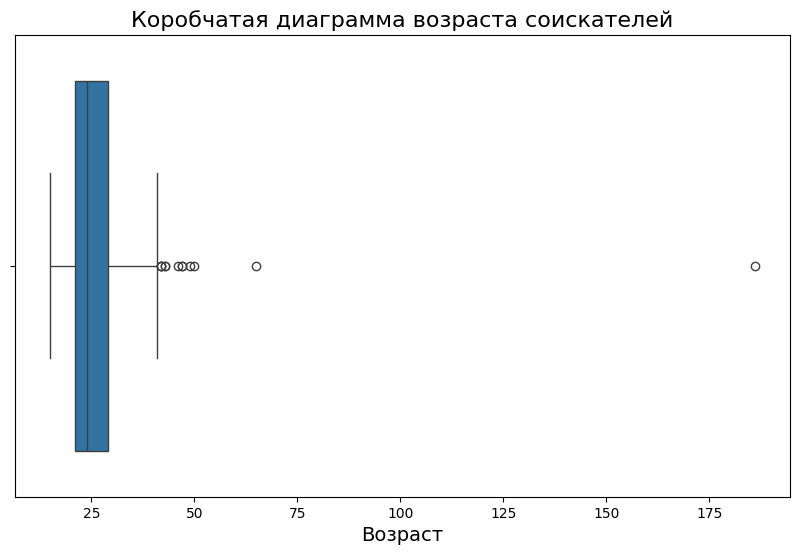

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Коробчатая диаграмма возраста соискателей', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.show()

Удаляем аномальные выбросы

In [ ]:
min_age = 16
max_age = 65

df_filtered = df[(df['Age'] >= min_age) & (df['Age'] < max_age)]
print(f"Количество строк после фильтрации по возрасту: {df_filtered.shape[0]} из {df.shape[0]}")
df = df_filtered.reset_index(drop=True)

Количество строк после фильтрации по возрасту: 320 из 325


In [ ]:
df_sorted = df.sort_values(by='Age')
df_sorted

,applicant_name,Age,Ответ на вопрос
227,name_231,17.0,Нет
201,name_205,17.0,Нет
287,name_291,17.0,Нет
243,name_247,17.0,Нет
20,name_20,18.0,Да
...,...,...,...
138,name_141,46.0,Нет
40,name_40,47.0,Нет
273,name_277,47.0,Нет
0,name_0,49.0,Нет


In [ ]:
age_stats = df.groupby('Ответ на вопрос')['Age'].describe()
age_stats

,count,mean,std,min,25%,50%,75%,max
Ответ на вопрос,,,,,,,,
Да,144.0,27.034722,6.213467,18.0,22.75,25.0,31.0,43.0
Нет,176.0,24.988636,6.472790,17.0,21.00,24.0,28.0,50.0


Проверяем группы на наличия нормального распределения

In [ ]:
from scipy.stats import shapiro

age_yes = df[df['Ответ на вопрос'] == 'Да']['Age']
age_no = df[df['Ответ на вопрос'] == 'Нет']['Age']

stat_shapiro_yes, p_shapiro_yes = stats.shapiro(age_yes)
print(f"Шапиро-Уик Тест для категории 'Да': Statistics={stat_shapiro_yes:.4f}, p-value={p_shapiro_yes:.4f}")

stat_shapiro_no, p_shapiro_no = stats.shapiro(age_no)
print(f"Шапиро-Уик Тест для категории 'Нет': Statistics={stat_shapiro_no:.4f}, p-value={p_shapiro_no:.4f}")

if p_shapiro_yes < 0.05:
  print('распределение не нормальное')
else:
  print('распределение нормальное')

Шапиро-Уик Тест для категории 'Да': Statistics=0.9159, p-value=0.0000
Шапиро-Уик Тест для категории 'Нет': Statistics=0.8397, p-value=0.0000
распределение не нормальное


Так как у обеих групп не нормальное распределение для выявления влияния возраста соискателей на выполнение задачи в сопроводительном письме используем тест Манна-Уитни

In [ ]:
from scipy.stats import mannwhitneyu

u_stat, p_value_mw = mannwhitneyu(age_yes, age_no, alternative='two-sided')
print(f"Тест Манна-Уитни: U-Statistic={u_stat}, P-Value={p_value_mw:.4f}")

if p_value_mw > 0.05:
  print('Возраст соискателей НЕ влияет на выполнение тестового задания')
else:
  print('Возраст соискателей влияет на выполнение тестового задания')

Тест Манна-Уитни: U-Statistic=15720.5, P-Value=0.0002
Возраст соискателей влияет на выполнение тестового задания


Вывод

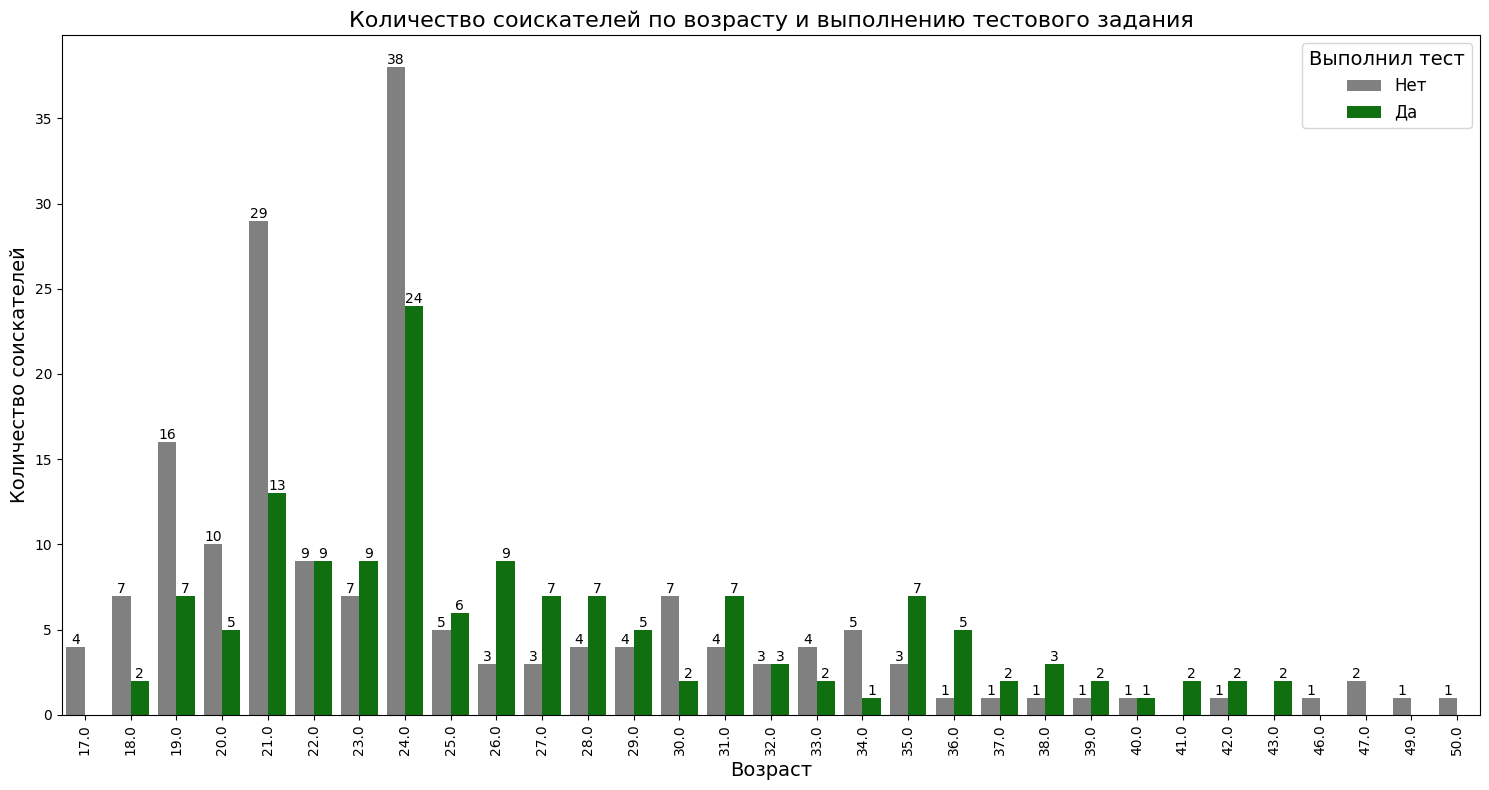

In [ ]:
age_response_counts = df.groupby(['Age', 'Ответ на вопрос']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))

sns.barplot(
    data=age_response_counts,
    x='Age',
    y='Count',
    hue='Ответ на вопрос',
    palette={'Да': 'green', 'Нет': 'grey'},
    order=sorted(df['Age'].unique())
)

plt.title('Количество соискателей по возрасту и выполнению тестового задания', fontsize=16)
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество соискателей', fontsize=14)
plt.legend(title='Выполнил тест', title_fontsize=14, fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.show()

Возраст соискателей связан с наличием решения задачи в сопроводительном письме. Средние возрастные группы (примерно 25-36 лет) более склонны выполнять тестовые задания, тогда как молодые (до 21 года) и старшие (45+ лет) соискатели менее склонны к этому. Это указывает на необходимость учета возрастных особенностей при разработке и оценке тестовых заданий, а также при подборе персонала.